## Assignment2 Vehicle Detection

### !!! Warning !!!
#### this detection is coding in win10 platform, 
#### also using the git version control system is hard to upload all these data
#### If you want to check the answer is correct or not, 
#### plz change the absolute dir to relative dir in MacOS or other system.
#### Sorry for bringing you troubles.

In [1]:
# This assignment has the following step
# 1st step: data processing(in the img_processing part)
# 2nd step: feature extraction
# 3rd step: training process
# 4th step: evaluation process

In [2]:
# Here are some sample which implement the Vehicle detection based on HOG + Color histogram + SVM
# Source: https://github.com/ckirksey3/vehicle-detection-with-svm
# Another Chinese Version of Vehicle Detection
# Source: https://zhuanlan.zhihu.com/p/60229208

### Feature Extraction

In [3]:
# HOW TO READ IMAGE BY USING OPENCV IN CHINESE DIRECTORY 
# Source: https://www.programmersought.com/article/3090516575/
# If you are using the macos or other system,
# Plz change the image read function to cv2.imread()
def cv_imread(file_path):
    cv_img = cv2.imdecode(np.fromfile(file_path,dtype=np.uint8),-1)
    return cv_img

In [4]:
import numpy as np 
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# This Assignment used the Hog + color histogram
# This is Due to that the output vector can easily connect with each other
# You can also choose the SIFT, but SIFT needs to create the Bag of Words
# This will increate the work, also hard for freshman to implement

In [6]:
# The Hog feature also used in object detection
# Source: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
# Example Of using Hog
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [7]:
# If want to check the answer plz change the dir in other system platform

# Setting the directory with the absolute directory in WIN10
vehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\'
nonvehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\nonvehicle_data\\'
# select an image as the test sample to check the hog and color
test_sample = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\IMG_25.png'

In [8]:
# Here need to use Hog-----> Parameters
# Source: https://www.kite.com/python/docs/skimage.feature.hog#
# The return has 2 return which are newarr and hog_image
# You can also find this code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# the current version of skimage should change visualise to visualize!!!!
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    # visualise == False ----> hog img connot see ----> 1 output
    if vis == False:
        hog_features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=vis, feature_vector=feature_vec)
        # get the return features
        return hog_features
    elif vis == True:
        # visualise == True ----> hog img can be seen ----> 2 outputs
        hog_features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=True, visualize=vis, feature_vector=feature_vec)
        # get the return features and image
        return hog_features,hog_image

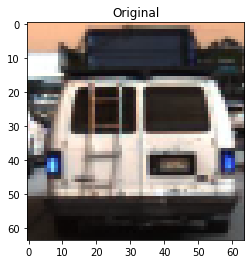

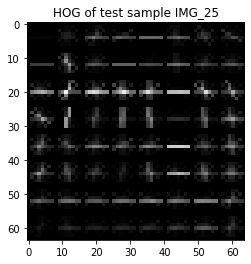

In [9]:
# This test is to check the hog function is right or not
# Check the HOG method
feature_test_image1 = cv2.imread(test_sample)
# This is because plt should based on RGB ----> convert the color
test_hog_image1 = cv2.cvtColor(feature_test_image1, cv2.COLOR_BGR2RGB)
hog_features1, hog_image1 = get_hog_features(test_hog_image1[:,:,0], orient=9, pix_per_cell=8, cell_per_block=2, vis=True, feature_vec=True)

# check the original 
plt.title('Original')
plt.imshow(feature_test_image1)
plt.show()

# check the hog_image 
plt.imshow(hog_image1,'gray')
plt.title('HOG of test sample IMG_25')
plt.show()

In [10]:
# The bin spatial is to get the binned color features
# Set the size as 32 * 32
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
size_tuple = (32,32)
def bin_spatial(image,img_size=size_tuple):
    features = cv2.resize(image,img_size)
    # Change the array to 1-D array
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
    flatten_feature = features.ravel()
    return flatten_feature

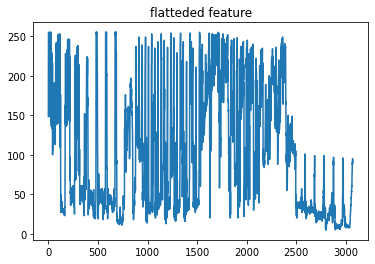

In [11]:
# Based on the previous test image we can get the following result
# This test is to check the bin_spatial function is right or not
flatteded_feature1 = bin_spatial(test_hog_image1)
# print the image graph
plt.plot(flatteded_feature1)
plt.title('flatteded feature')
plt.show()

In [12]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
def colour_histogram(image, nbins=32, bins_range=(0,256)):
    channel_tuple = ()
    # np histogram needs 3 parameters
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    first_channel = image[:,:,0]
    second_channel = image[:,:,1]
    third_channel = image[:,:,2]
    # generating the first channel histogram
    channel1_histogram = np.histogram(first_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel1_histogram
    # generating the second channel histogram
    channel2_histogram = np.histogram(second_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel2_histogram
    # generating the third channel histogram
    channel3_histogram = np.histogram(third_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel3_histogram
    # connect 3 channel together different from stack
    # can setting the the axis to decide the direction of connection
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
    hist_features = np.concatenate(channel_tuple,axis=0)
    return hist_features

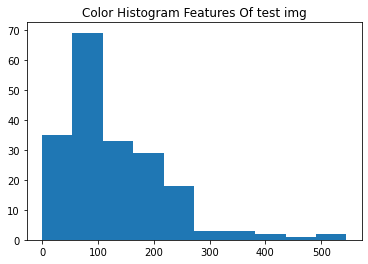

In [13]:
# Based on the previous test image we can get the following result
# This test is to check the color_histogram function is right or not
test_hist_features1= colour_histogram(test_hog_image1)
plt.hist(test_hist_features1)
plt.title('Color Histogram Features Of test img')
plt.show()

In [14]:
# Define a function to extract features from a single image window
# This image window just silding image to get the features
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# color space dictionary
def single_img_features(image, color_space='RGB', spatial_size=(32, 32),hist_bins=32, orient=9,pix_per_cell=8, cell_per_block=2, hog_channel=0,spatial_feat=True, hist_feat=True,hog_feat=True, hog_features=None):
    feature_list = list()
    color_space_dict = {'HSV':cv2.COLOR_RGB2HSV,'HLS':cv2.COLOR_RGB2HLS,'LUV':cv2.COLOR_RGB2LUV,'YCrCb':cv2.COLOR_RGB2YCrCb,'YUV':cv2.COLOR_RGB2YUV}
    # Check the current image sapce and doing the convert operation
    if color_space != 'RGB':
        if color_space == 'HSV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('HSV'))
        elif color_space == 'HLS':
            converted_image = cv2.cvtColor(image, color_space_dict.get('HLS'))
        elif color_space == 'LUV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('LUV'))
        elif color_space == 'YCrCb':
            converted_image = cv2.cvtColor(image, color_space_dict.get('YCrCb'))
        elif color_space == 'YUV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('YUV'))
    else: 
        # just like copy the matrix, due to the cv object is ndarray
        # Source: https://numpy.org/doc/stable/reference/generated/numpy.copy.html
        converted_image = np.copy(image)

    # check whther need to compute the bin_spatial
    if spatial_feat == True:
        # Using the previous bin_spatial function to get the bin_spatial_features
        bin_spatial_features = bin_spatial(converted_image, img_size=spatial_size)
        feature_list.append(bin_spatial_features)
    else:
        pass

    # check whther need to compute the colour_histogram
    if hist_feat == True:
        # Using the previous colour_histogram function to get the colour_histogram_features
        colour_histogram_features = colour_histogram(converted_image, nbins=hist_bins)
        feature_list.append(colour_histogram_features)
    else:
        pass

    # check whther need to compute the hog_features
    # 2 kinds situation all feature or hog feature

    if hog_feat == True:
        # this 2 mean getting all three channels which are channel 0 channel 1 channel 2
        # getting all 3 channels of the HOG
        if hog_channel == 2:
            hog_features = list()
            all_channels = converted_image.shape[2]
            for channel in range(all_channels):
                hog_features.extend(get_hog_features(converted_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        # Getting the first channel of the hog
        # else:
        #     hog_fisrt_channel = 0
        #     converted_firstchannel_image = converted_image[:,:,hog_fisrt_channel]
        #     hog_features = get_hog_features(converted_firstchannel_image, orient, 
        #                 pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # adding the feature to the list
        feature_list.append(hog_features)

    # Return concatenated array of features / connecting these features
    # This is also the advantage why choosing hog color histogram 
    # Easy to do the vector connection, No Bow implementation
    return np.concatenate(feature_list)

In [15]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# extract feature based on the single_img_features --based on--> get_hog_features / bin_spatial / colour_histogram
def extract_features(images, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features_collector = list()
    # Iterate through the list of images
    for image in images:
        # image = cv2.imread(img)
        imag_features = single_img_features(image, color_space, spatial_size,
            hist_bins, orient, pix_per_cell, cell_per_block, hog_channel,
            spatial_feat, hist_feat, hog_feat)
        features_collector.append(imag_features)
    # Return list of feature vectors
    return features_collector

### Training Process

In [16]:
# How to use shuffle to disorder the input images
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Recursively searching the file in the dir
# Source: https://docs.python.org/3/library/glob.html
import glob
# Using pickle for Object Serialization
# Source: https://docs.python.org/3/library/pickle.html
import pickle
# check the current of loading images
from tqdm import tqdm

In [17]:
# This two list is used to store the data
vehicle_image_list = list()
nonvehicle_image_list = list()

In [18]:
# This path is for windows 10 getting all the images from vehicle and nonvehicle dir
# If you are using the Macos plz change the directory
vehicle_path = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\*.png'
nonvehicle_path = 'C:\\Users\\75611\\Desktop\\Data\\nonvehicle_data\\*.png'
all_vehicles_images = glob.glob(vehicle_path,recursive=True)
all_nonvehicles_images = glob.glob(nonvehicle_path,recursive=True)

In [19]:
# Reading image from the directory
for vehicle_temp_image in tqdm(all_vehicles_images):
    # vehicle_image_list.append(cv_imread(vehicle_temp_image))
    # This is for MacOS reading image
    vehicle_image_list.append(cv2.imread(vehicle_temp_image))
for nonvehicle_temp_image in tqdm(all_nonvehicles_images):
    # nonvehicle_image_list.append(cv_imread(nonvehicle_temp_image))
    # This is for MacOS reading image
    nonvehicle_image_list.append(cv2.imread(nonvehicle_temp_image))

100%|██████████| 10713/10713 [00:03<00:00, 3040.38it/s]


In [20]:
# This process is to test whether the image has read or not
# Already get the data
print(type(vehicle_image_list))
print(type(vehicle_image_list[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [21]:
# Shuffle the image in vehicle_image_list ----> disorder
vehicle_image_list = shuffle(vehicle_image_list)
# Shuffle the image in nonvehicle_image_list ----> disorder
nonvehicle_image_list = shuffle(nonvehicle_image_list)

In [22]:
# Setting these parameter similar with the previous part
# color space ---> HLS
color_space = "HLS"
# spatialsize  ---> 32 * 32 this parameter need test
spatial_size = (32,32)
hist_bin = 32
orient = 9
pix_pr_cell = 8
cell_pr_block = 2
# Getting all channgel features
# this 2 mean getting all three channels which are channel 0 channel 1 channel 2
hog_channel = 2
# get spatial feature
spatial_feat = True
# get histogram feature
hist_feat = True
# get the hog feature
hog_feat = True

In [23]:
# This is for getting all these feature of vehicle image
all_vehicles_feature = extract_features(vehicle_image_list,color_space,spatial_size,hist_bin,orient,pix_pr_cell,cell_pr_block,hog_channel,spatial_feat,hist_feat,hog_feat)

In [24]:
# This is for getting all these feature of non-vehicle image
all_nonvehicles_feature = extract_features(nonvehicle_image_list,color_space,spatial_size,hist_bin,orient,pix_pr_cell,cell_pr_block,hog_channel,spatial_feat,hist_feat,hog_feat)

In [25]:
# Getiting X and Y from the data
# getting vehicle features
vehicle_feature_tuples = (all_vehicles_feature,all_nonvehicles_feature)
# Using the stack to connect
X_data = np.vstack(vehicle_feature_tuples)
# Changing the type to float 64
print(X_data.dtype)
X_data = X_data.astype(np.float64)
print(X_data.dtype)
# Notice the shape of X_data
# the standard Scaler accept 2 dimension
print(X_data.shape)

float64
float64
(21426, 8559)


In [26]:
# training the data from the traing set Normalized the data
# Standardize features by removing the mean and scaling to unit variance
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_scaler = StandardScaler().fit(X_data)
scaled_X = X_scaler.transform(X_data)

In [27]:
# getting the training data Y
# Using the one hot code here
# Source: https://en.wikipedia.org/wiki/One-hot
print(type(all_vehicles_feature))
print(type(all_nonvehicles_feature))
vehicle_length = len(all_vehicles_feature)
nonvehicle_length = len(all_nonvehicles_feature)
# Therefore, generating the same length ones and zeros vector to combine the one-hot code
generating_one = np.ones(vehicle_length)
print(generating_one.shape)
generating_zero = np.zeros(nonvehicle_length)
print(generating_zero.shape)
# Finally, Generating the Y
Y = np.hstack((generating_one,generating_zero))
print(Y.shape)

<class 'list'>
<class 'list'>
(10713,)
(10713,)
(21426,)


In [28]:
# 8 : 2 = training : testing
# How to use train test split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
get_random_number = np.random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y,test_size=0.2,random_state = get_random_number)

In [29]:
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train,y_train)
print('Test Accuracy of SVC = ',round(linear_svc_model.score(X_test,y_test), 5))

Test Accuracy of SVC =  0.97503


In [30]:
#　This part is to save the training model to the local position
# saveing the model into the current directory

In [31]:
# save it into a file named svc_save.p
# dumping the data into the file 
# Source: https://docs.python.org/3/library/pickle.html
# with can help to close when finish
with open("linear_SVM.mdl", "wb") as file:
    pickle.dump((linear_svc_model, X_scaler), file)

In [32]:
# from sklearn.ensemble import AdaBoostClassifier

In [33]:
# This part is for adaboost ----> hard to convergence

# clf_ada_svc = AdaBoostClassifier(LinearSVC(),algorithm='SAMME',n_estimators=150,learning_rate=0.8,random_state=get_random_number)
# clf_ada_svc.fit(X_train,y_train)
# print('Test Accuracy of Adaboost SVC = ',round(clf_ada_svc.score(X_test,y_test), 5))

In [34]:
# with open("Ada_Linear_SVC.mdl", "wb") as file:
#    pickle.dump((Ada_Linear_SVC,mdl, X_scaler), file)

### Searching the data of the Vehicle on the piacture

In [35]:
# getting the training information from the .mdl file
with open("linear_SVM.mdl", "rb") as file:
    linear_svc, X_scaler = pickle.load(file)

In [36]:
# What is heat map
# Source: https://en.wikipedia.org/wiki/Heat_map
# Source: Use Heat Map to Reduce False Positives and Dupe
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Consider each "Box" is like ((x0,y0),(x1,y1))
        # For all pixel in the boundry adding 1 can get the different
        # [y0:y1],[x0,x1]
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # get the heat map
    return heatmap

In [39]:
# This labels is from heat map
# by using the scipy.ndimage.measurements.label can get the label
# More information can find in the following link
# Source: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html

#  You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
def draw_label(image, labels):
    copied_image = np.copy(image)
    labels_range = labels[1] + 1
    for vehicle_num in range(1, labels_range):
        # Find pixels with each car_number label value
        non_zero = (labels[0] == vehicle_num).nonzero()

        getting_y = nonzero[0]
        getting_x = nonzero[1]
        non_array_zero_y = np.array(getting_y)
        non_array_zero_x = np.array(getting_x)

        # The min and the max will create the box
        x_min = np.min(non_array_zero_x)
        y_min = np.min(non_array_zero_y)
        x_max = np.max(non_array_zero_x)
        y_max = np.max(non_array_zero_y)
        bbox = ((x_min,y_min), (x_max, y_max))
        # Draw the box on the image

        cv2.rectangle(copied_image, bbox[0], bbox[1], (0,255,0), thick=8)
    return copied_image


In [40]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# go through the threshold and set the value of the picture
def threshold_(heatmap, threshold):
    # Zero out pixels below the threshold
    np.where(heatmap > threshold, heatmap, 0)
    return heatmap

In [ ]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# start creating the slide window to search the image
# The windows size 64*64 need test, choose 64 * 64 is due to the previous picture selection
def slide_window_to_search(image, x_start_end=[None, None], y_start_end=[None, None], slide_window=(64, 64), slide_overlap=(0.5, 0.5)):
    if x_start_end[0] == None:
        x_start_end[0] = 0
    if x_start_end[1] == None:
        x_start_end[1] = image.shape[1]
    if y_start_end[0] == None:
        y_start_end[0] = 0
    if y_start_end[1] == None:
        y_start_end[1] = image.shape[0]
    

### Evaluation Part